In [ ]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets
!pip install tensorflow-datasets==4.3
# !pip install -U deepctr-torch
!pip install torchfm

Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.11.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.11.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-1.14.0-cp37-cp37m-manylinux1_x86_64.whl (109.3 MB)
  Using cached tensorflow_estimator-1.14.0-py2.py3-none-any.whl (488 kB)
  Using cached tensorboard-1.14.0-py3-none-any.whl (3.1 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling t

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow_datasets-4.3.0-py3-none-any.whl (3.9 MB)
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.7.0
    Uninstalling tensorflow-datasets-4.7.0:
      Successfully uninstalled tensorflow-datasets-4.7.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip uninstall gensim
!pip install gensim
!pip install uszipcode

Found existing installation: gensim 3.6.0
Uninstalling gensim-3.6.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/gensim-3.6.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/gensim/*
Proceed (y/n)? y
  Successfully uninstalled gensim-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 2.4 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataDir = "/content/drive/MyDrive/data"

In [ ]:
import tensorflow as tf
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

In [ ]:
import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences

# from deepctr_torch.inputs import SparseFeat, VarLenSparseFeat, get_feature_names
from torchfm.model.dcn import DeepCrossNetworkModel
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np

In [ ]:
!pip install deepctr_torch
from deepctr_torch.inputs import SparseFeat, VarLenSparseFeat, get_feature_names

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(tf.__version__)

2.11.0


In [ ]:
def split(x):
    key_ans = x.split('|')
    for key in key_ans:
        if key not in key2index:
            # Notice : input value 0 is a special "padding",so we do not use 0 to encode valid feature for sequence input
            key2index[key] = len(key2index) + 1
    return list(map(lambda x: key2index[x], key_ans))

In [ ]:
from time import time
from scipy.sparse import csc_matrix
import tensorflow as tf
import numpy as np
import h5py

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import math
import string
import numpy
import pandas as pd
import datetime
import dateutil
import matplotlib.pyplot as plt
from uszipcode import SearchEngine
engine = SearchEngine()
from collections import defaultdict
from gensim.models import Word2Vec
from nltk.stem.porter import *
from sklearn import linear_model
from sklearn.manifold import TSNE

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
path = "/content/drive/MyDrive/data/MovieLens_1M/"

In [ ]:
df_user = pd.read_csv(path+"users.dat", sep = "::", header=None,
names=["UserID","Gender","Age","Occupation","Zipcode"])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
states = []
states_count = defaultdict()
User_state = defaultdict()
User_Gender = defaultdict()
User_Age = defaultdict()
User_Occupation = defaultdict()
for i in range(len(df_user)):
    zip = df_user['Zipcode'][i]
    #zip = df_user['Zipcode'][i][:5]
    zipcode = engine.by_zipcode(zip)
    if str(zipcode) == 'None' :
        #if len(gmaps.geocode(zip))>0:
           #state = gmaps.geocode(zip)[0]['address_components'][2]['short_name']
        User_state[df_user['UserID'][i]] = 'None'
        states.append('None')
    else:
        state = zipcode.state
        if state in states_count:
            states_count[state] += 1
        else:
            states_count[state] = 1
        User_state[df_user['UserID'][i]] = state
        states.append(state)
    User_Gender[df_user['UserID'][i]] = df_user['Gender'][i]
    User_Occupation[df_user['UserID'][i]] = df_user['Occupation'][i]
    User_Age[df_user['UserID'][i]]=df_user['Age'][i]

In [ ]:
df_user['State'] = states
df_user

,UserID,Gender,Age,Occupation,Zipcode,State
0,1,F,1,10,48067,MI
1,2,M,56,16,70072,LA
2,3,M,25,15,55117,MN
3,4,M,45,7,02460,MA
4,5,M,25,20,55455,MN
...,...,...,...,...,...,...
6035,6036,F,25,15,32603,FL
6036,6037,F,45,1,76006,TX
6037,6038,F,56,1,14706,NY
6038,6039,F,45,0,01060,MA


In [ ]:
df_rating = pd.read_csv(path+"ratings.dat", sep = "::", header=None,
names=["UserID","MovieID","Rating","Timestamp"])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
df_movie = pd.read_csv(path+"movies.dat", sep = "::", header=None,
names=["MovieID","Title","Genres"],encoding="ISO-8859-1")

In [ ]:
df_movie

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
MovieID_Title = defaultdict()
for index,row in df_movie.iterrows():
    MovieID_Title[row['MovieID']] = row['Title'][:-6]

In [ ]:
MoviePerGenres = defaultdict(list)
MoviePerTitle = defaultdict()
MoviePerYear = defaultdict()
genres = set()
genre_cnt = defaultdict(int)
for i in range(len(df_movie)):
    gen = df_movie['Genres'][i].split("|")
    movie_id = df_movie['MovieID'][i]
    MoviePerTitle[movie_id] = df_movie['Title'][i][:-6]
    MoviePerYear[movie_id] = df_movie['Title'][i][-5:-1]
    for g in gen:
        if g in genre_cnt:
            genre_cnt[g] += 1
        else:
            genre_cnt[g] = 1
        genres.add(g)
        MoviePerGenres[movie_id].append(g)

In [ ]:
date = []
for i in range(len(df_rating)):
    ts = df_rating['Timestamp'][i]
    date.append(datetime.datetime.fromtimestamp(ts))
df_rating['date'] = date
df_rating['Month'] = pd.DatetimeIndex(df_rating['date']).month
df_rating['Hour'] = pd.DatetimeIndex(df_rating['date']).hour
Gender = []
Age = []
State = []
Occupation = []
Genres = []
for id,row in df_rating.iterrows():
    u = row['UserID']
    Gender.append(User_Gender[u])
    Age.append(User_Age[u])
    State.append(User_state[u])
    Occupation.append(User_Occupation[u])
    m = row['MovieID']
    Genres.append(MoviePerGenres[m])

In [ ]:
df_rating['Gender'] = Gender
df_rating['Age'] = Age
df_rating['State'] = State
df_rating['Occupation'] = Occupation
df_rating['Genres'] = Genres

In [ ]:
df_rating

,UserID,MovieID,Rating,Timestamp,date,Month,Hour,Gender,Age,State,Occupation,Genres
0,1,1193,5,978300760,2000-12-31 22:12:40,12,22,F,1,MI,10,[Drama]
1,1,661,3,978302109,2000-12-31 22:35:09,12,22,F,1,MI,10,"[Animation, Children's, Musical]"
2,1,914,3,978301968,2000-12-31 22:32:48,12,22,F,1,MI,10,"[Musical, Romance]"
3,1,3408,4,978300275,2000-12-31 22:04:35,12,22,F,1,MI,10,[Drama]
4,1,2355,5,978824291,2001-01-06 23:38:11,1,23,F,1,MI,10,"[Animation, Children's, Comedy]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,2000-04-26 02:35:41,4,2,M,25,NY,6,[Comedy]
1000205,6040,1094,5,956704887,2000-04-25 23:21:27,4,23,M,25,NY,6,"[Drama, Romance, War]"
1000206,6040,562,5,956704746,2000-04-25 23:19:06,4,23,M,25,NY,6,"[Comedy, Drama]"
1000207,6040,1096,4,956715648,2000-04-26 02:20:48,4,2,M,25,NY,6,[Drama]


In [ ]:
from sklearn.utils import shuffle
#打乱数据集,random_state随机种子可复现
df = shuffle(df_rating,random_state=20)
df

###Test-1m
df_rating_train = df.iloc[0:900000]
df_rating_valid = df.iloc[900000:950000]
df_rating_test = df.iloc[950000:1000000]

###Test-100k
df_rating_train = df.iloc[0:90000]
df_rating_valid = df.iloc[90000:95000]
df_rating_test = df.iloc[95000:100000]

In [ ]:
#use the title word2vec
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for i in range(len(df_movie)):
    r = ''.join([c for c in df_movie['Title'][i][:-6].lower() if not c in punctuation])
    ws = r.split()
    for w in ws:
        wordCount[w] += 1
print(len(wordCount))

4550


In [ ]:
counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

In [ ]:
unigrams = [w[1] for w in counts[:1000]]
unigramId = defaultdict()
print(unigrams[:10])
for i in range(len(unigrams)):
    unigramId[unigrams[i]] = i
unigramSet = set(unigrams)

['the', 'of', 'a', 'in', 'and', 'to', 'man', 'on', 'love', 'ii']


In [ ]:
reviews = []

In [ ]:
## all the titles can be used
for index,row in df.iterrows():
    movie = row['MovieID']
    reviews.append(MoviePerTitle[movie])

In [ ]:
reviewTokens = []
punctuation = set(string.punctuation)
for r in reviews:
    r = ''.join([c for c in r.lower() if not c in punctuation])
    tokens = []
    for w in r.split():
        tokens.append(w)
    reviewTokens.append(tokens)

In [ ]:
model10 = Word2Vec(reviewTokens,
                 min_count=1, # Words/items with fewer instances are discarded
                 vector_size=10, # Model dimensionality
                 window=3, # Window size
                 sg=1) # Skip-gram model

In [ ]:
model10.wv[12]

array([-2.4441165e-01, -1.8382432e+00, -3.8095351e-02, -1.3889527e-01,
        1.8399960e+00, -2.7875119e-01, -1.4622661e+00,  5.0072470e+00,
       -3.2522552e+00,  6.1068282e-04], dtype=float32)

In [ ]:
reviewTokens[0]

['mission', 'impossible']

In [ ]:
def Cosine(x1,x2):
    numer = 0
    norm1 = 0
    norm2 = 0
    for i in range(len(x1)):
        a1 = x1[i]
        a2 = x2[i]
        numer += a1*a2
        norm1 += a1**2
        norm2 += a2**2
    if norm1*norm2 != 0:
        return numer / math.sqrt(norm1*norm2)
    return 0

In [ ]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom == 0:
        return 0
    return numer / denom

In [ ]:
similarities = model10.wv.similar_by_word(reviewTokens[0][0])[:5]

In [ ]:
similarities

[('wellville', 0.9287581443786621),
 ('road', 0.9249494075775146),
 ('arlington', 0.9194822907447815),
 ('trip', 0.9136356711387634),
 ('zahlt', 0.8980842232704163)]

In [ ]:
reviewsPerUser = defaultdict(list)
reviewsPerItem = defaultdict(list)
RatingPerItem = defaultdict(list)
RatingPerUser = defaultdict(list)
RatingPerPair = defaultdict()
UserPerItem = defaultdict(set)
ItemPerUser = defaultdict(set)
genresPerUser = defaultdict(list)
OccupationPeritem = defaultdict(list)
items = set()
users = set()
# A few utilities
itemAverages = defaultdict(list)
usersAverages = defaultdict(list)
ratingMean = []
gender = set()
genres = set()
states = set()

for id,d in df.iterrows():
    u,b,r = d['UserID'],d['MovieID'],d['Rating']
    state = d['State']
    gens = d['Genres']
    gd = d['Gender']

    r = int(r)
    RatingPerUser[u].append(r)
    RatingPerItem[b].append(r)
    reviewsPerUser[u].append(d)
    reviewsPerItem[i].append(d)
    RatingPerPair[(u,b)]=r
    UserPerItem[b].add(u)
    ItemPerUser[u].add(b)
    items.add(b)
    users.add(u)
    for g in gens:
         genres.add(g)
    states.add(state)
    gender.add(gd)
    
    itemAverages[d['MovieID']].append(d['Rating'])
    usersAverages[d['UserID']].append(d['Rating'])
    ratingMean.append(d['Rating'])
    OccupationPeritem[b].append(User_Occupation[u])
    for g in MoviePerGenres[b]:
         genresPerUser[u].append(g)

for i in itemAverages:
    itemAverages[i] = sum(itemAverages[i]) / len(itemAverages[i])

for u in usersAverages:
    usersAverages[u] = sum(usersAverages[u]) / len(usersAverages[u])

ratingMean = sum(ratingMean) / len(ratingMean)

In [ ]:
gender = list(gender)
genres = list(genres)
states = list(states)
print(len(gender))
print(len(genres))
print(len(states))
gender_dict = defaultdict(int)
genres_dict = defaultdict(int)
states_dict = defaultdict(int)

2
18
56


In [ ]:
for i in range(len(gender)):
      gender_dict[gender[i]] = i + 1

for i in range(len(genres)):
      genres_dict[genres[i]] = i + 1

for i in range(len(states)):
      states_dict[states[i]] = i + 1

In [ ]:
# we use the top3 of the occupations
# From my HW2 solution, welcome to reuse
def simWord2Vec(user,item):
    ratings = []
    similarities = []
    for d in reviewsPerUser[user]:
        i2 = d['MovieID']
        if i2 == item: continue
        #这里因为数据结构是set，不用转换
        sim = Cosine(model10.wv[item],model10.wv[i2])
        similarities.append(numpy.abs(sim))
        if len(similarities) > 0:
            return sum(similarities)/len(similarities)
        else:
            return 0

def simUserPerGenre(user,item):
    ratings = []
    similarities = []
    for d in reviewsPerItem[item]:
        v = d['UserID']
        if v == user: continue
        #这里因为数据结构是set，不用转换
        sim = Jaccard(set(genresPerUser[user]),set(genresPerUser[v]))
        similarities.append(sim)
        return sum(similarities)/len(similarities)

In [ ]:
sim_title_Word2Vec = []
sim_GenreperUser = []
for ix,row in df.iterrows():
    u,i = row['UserID'],row['MovieID']
    sim_title_Word2Vec.append(simWord2Vec(u,i))

In [ ]:
df['sim_title_Word2Vec'] = sim_title_Word2Vec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df = df.drop(['date', 'Timestamp'], axis=1)

In [ ]:
df

,UserID,MovieID,Rating,Month,Hour,Gender,Age,State,Occupation,Genres,sim_title_Word2Vec
246667,1490,648,4,11,1,M,50,CA,7,"[Action, Adventure, Mystery]",0.349362
449484,2771,47,4,11,1,M,18,CA,1,"[Crime, Thriller]",0.586894
750684,4478,2385,2,3,21,M,1,MA,12,"[Comedy, Romance]",0.198455
935407,5643,1758,4,5,6,F,35,UT,1,[Drama],0.811012
447463,2756,2028,5,11,19,M,18,OR,4,"[Action, Drama, War]",0.840639
...,...,...,...,...,...,...,...,...,...,...,...
556250,3418,1516,5,8,17,F,18,VA,3,[Comedy],0.488522
744348,4447,1320,1,8,22,M,45,FL,5,"[Action, Horror, Sci-Fi, Thriller]",0.298340
285919,1706,3624,4,11,9,M,25,PA,20,[Action],0.269315
37135,251,3916,4,12,17,M,56,MN,17,[Drama],0.412135


In [ ]:
similarities = model10.wv.similar_by_word(reviewTokens[0][0])[:5]

In [ ]:
similarities

[('wellville', 0.9287581443786621),
 ('road', 0.9249494075775146),
 ('arlington', 0.9194822907447815),
 ('trip', 0.9136356711387634),
 ('zahlt', 0.8980842232704163)]

In [ ]:
!pip install fastfm2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 496 kB 5.1 MB/s 
     |████████████████████████████████| 7.1 MB 56.3 MB/s 
     |████████████████████████████████| 14.8 MB 45.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22.2.post1 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.11.0 requir

In [ ]:
import scipy
from fastfm2 import als
from scipy.spatial import distance

NO CLASSIFICATION MODULE EXISTS!


In [ ]:
def MSE(Y,Y_pred):
    mse = numpy.square(numpy.subtract(numpy.array(Y),numpy.array(Y_pred))).mean()
    return mse

In [ ]:
Genres_text = []
for id,row in df.iterrows():
    s = ""
    for g in row['Genres']:
      s += " "
      s += g
    Genres_text.append(s)
df['Genres_text'] = Genres_text

In [ ]:
df

,UserID,MovieID,Rating,Month,Hour,Gender,Age,State,Occupation,Genres,sim_title_Word2Vec,Genres_text
246667,1490,648,4,11,1,M,50,CA,7,"[Action, Adventure, Mystery]",0.349362,Action Adventure Mystery
449484,2771,47,4,11,1,M,18,CA,1,"[Crime, Thriller]",0.586894,Crime Thriller
750684,4478,2385,2,3,21,M,1,MA,12,"[Comedy, Romance]",0.198455,Comedy Romance
935407,5643,1758,4,5,6,F,35,UT,1,[Drama],0.811012,Drama
447463,2756,2028,5,11,19,M,18,OR,4,"[Action, Drama, War]",0.840639,Action Drama War
...,...,...,...,...,...,...,...,...,...,...,...,...
556250,3418,1516,5,8,17,F,18,VA,3,[Comedy],0.488522,Comedy
744348,4447,1320,1,8,22,M,45,FL,5,"[Action, Horror, Sci-Fi, Thriller]",0.298340,Action Horror Sci-Fi Thriller
285919,1706,3624,4,11,9,M,25,PA,20,[Action],0.269315,Action
37135,251,3916,4,12,17,M,56,MN,17,[Drama],0.412135,Drama


In [ ]:
sparse_features = ["MovieID", "UserID",
                       "Gender", "Age", "Occupation", "State", "Genres_text" ]
target = ['Rating']

# 1.Label Encoding for sparse features,and process sequence features
for feat in sparse_features:
     lbe = LabelEncoder()
     df[feat] = lbe.fit_transform(df[feat])
    # preprocess the sequence feature

In [ ]:
key2index = {}
# genres_list = list(map(split, data['genres'].values))
# genres_length = np.array(list(map(len, genres_list)))
# max_len = max(genres_length)
# Notice : padding=`post`
# genres_list = pad_sequences(genres_list, maxlen=max_len, padding='post', )

# 2.count #unique features for each sparse field and generate feature config for sequence feature

fixlen_feature_columns = [SparseFeat(feat, df[feat].nunique(), embedding_dim=4) for feat in sparse_features]

# varlen_feature_columns = [VarLenSparseFeat(SparseFeat('genres', vocabulary_size=len(
    # key2index) + 1, embedding_dim=4), maxlen=max_len, combiner='mean')]  # Notice : value 0 is for padding for sequence input feature

linear_feature_columns = fixlen_feature_columns
dnn_feature_columns = fixlen_feature_columns 

feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

# 3.generate input data for model
model_input = {name: df[name] for name in sparse_features}  #
# model_input["genres"] = genres_list

# 4.Define Model,compile and train

device = 'cpu'
use_cuda = True
if use_cuda and torch.cuda.is_available():
    print('cuda ready...')
    device = 'cuda:0'

In [ ]:
from deepctr_torch.models import DeepFM
model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression', device=device)
model.compile("adam", "mse", metrics=['mse'], )
history = model.fit(model_input, df[target].values, batch_size=256, epochs=20, verbose=2, validation_split=0.05)
mse = history.history['mse']

cpu
Train on 950198 samples, validate on 50011 samples, 3712 steps per epoch
Epoch 1/20
35s - loss:  0.9500 - mse:  0.9500 - val_mse:  0.8423
Epoch 2/20
37s - loss:  0.8371 - mse:  0.8371 - val_mse:  0.8423
Epoch 3/20
40s - loss:  0.8308 - mse:  0.8307 - val_mse:  0.8331
Epoch 4/20
35s - loss:  0.8163 - mse:  0.8163 - val_mse:  0.8101
Epoch 5/20
40s - loss:  0.7900 - mse:  0.7900 - val_mse:  0.7906
Epoch 6/20
35s - loss:  0.7693 - mse:  0.7692 - val_mse:  0.7768
Epoch 7/20
35s - loss:  0.7502 - mse:  0.7502 - val_mse:  0.7628
Epoch 8/20
36s - loss:  0.7336 - mse:  0.7336 - val_mse:  0.7531
Epoch 9/20
35s - loss:  0.7229 - mse:  0.7228 - val_mse:  0.7524
Epoch 10/20
35s - loss:  0.7159 - mse:  0.7158 - val_mse:  0.7456
Epoch 11/20
38s - loss:  0.7102 - mse:  0.7102 - val_mse:  0.7450
Epoch 12/20
35s - loss:  0.7057 - mse:  0.7056 - val_mse:  0.7427
Epoch 13/20
35s - loss:  0.7020 - mse:  0.7019 - val_mse:  0.7424
Epoch 14/20
35s - loss:  0.6991 - mse:  0.6990 - val_mse:  0.7443
Epoch 15

In [ ]:
mse = history.history['mse']
mse

[0.9465113841340781,
 0.8362974203709712,
 0.8321279658399302,
 0.8281643325120093,
 0.8061237244916273,
 0.7818787443742591,
 0.7617700110246945,
 0.7438910014161944,
 0.7290080274447704,
 0.7185019372066737]

In [ ]:
"""
Instantiates the DeepFM Network architecture.

    :param linear_feature_columns: An iterable containing all the features used by linear part of the model.
    :param dnn_feature_columns: An iterable containing all the features used by deep part of the model.
    :param use_fm: bool,use FM part or not
    :param dnn_hidden_units: list,list of positive integer or empty list, the layer number and units in each layer of DNN
    :param l2_reg_linear: float. L2 regularizer strength applied to linear part
    :param l2_reg_embedding: float. L2 regularizer strength applied to embedding vector
    :param l2_reg_dnn: float. L2 regularizer strength applied to DNN
    :param init_std: float,to use as the initialize std of embedding vector
    :param seed: integer ,to use as random seed.
    :param dnn_dropout: float in [0,1), the probability we will drop out a given DNN coordinate.
    :param dnn_activation: Activation function to use in DNN
    :param dnn_use_bn: bool. Whether use BatchNormalization before activation or not in DNN
    :param task: str, ``"binary"`` for  binary logloss or  ``"regression"`` for regression loss
    :param device: str, ``"cpu"`` or ``"cuda:0"``
    :param gpus: list of int or torch.device for multiple gpus. If None, run on `device`. `gpus[0]` should be the same gpu with `device`.
    :return: A PyTorch model instance.

"""



In [ ]:
!pip install hiplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 863 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 30.3 MB/s 
     |████████████████████████████████| 357 kB 35.7 MB/s 


In [ ]:
import hiplot as hip

data = []
batchs = [128,256,512]
epochs = [5,10,15,20,25,50]
l2_reg_linears = [0.01,0.1,0.2,0.3]

for batch in batchs:
  for ep in epochs:
    for dropout in dnn_dropouts:
          model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression', device=device)
          model.compile("adam", "mse", metrics=['mse'], )
          history = model.fit(model_input, df[target].values, batch_size=batch, epochs=ep, verbose=2, dnn_dropout=dropout,validation_split=0.05)
          mse = history.history['mse'][-1]
          hyperparameter_dict = {}
          hyperparameter_dict['epoch'] = ep
          hyperparameter_dict['batch_size'] = batch
          hyperparameter_dict['dnn_dropouts'] = dropout
          hyperparameter_dict['MSE'] = mse
          print(hyperparameter_dict)
          data.append(hyperparameter_dict)


hip.Experiment.from_iterable(data).display()


TypeError: ignored

In [ ]:
def plotHistory(history):
  rmse = history.history['mse']
  val_rmse = history.history['val_mse']

  loss = history.history['loss']
  # val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(rmse, label='Training MSE')
  plt.plot(val_rmse, label='Validation MSE')
  plt.legend(loc='lower right')
  plt.ylabel('MSE')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation MSE on DeepFM-full-overfit')

  # plt.subplot(2, 1, 2)
  # plt.plot(loss, label='Training Loss')
  # # plt.plot(val_loss, label='Validation Loss')
  # plt.legend(loc='upper right')
  # plt.ylabel('Loss')
  # plt.ylim([0,2.0])
  # plt.title('Training Loss')
  # plt.xlabel('epoch')
  # plt.show()

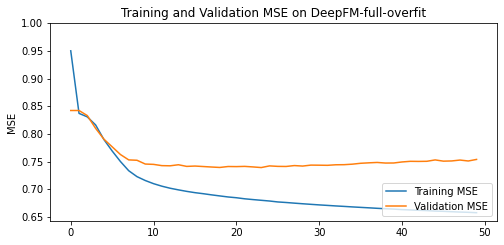

In [ ]:
plotHistory(history)